# SYSTEMS AND NETWORK BIOLOGY - PRACTICAL 2
# Negative feedback


---

To submit your report, answer the questions below and save the *notebook* clicking on `File > Download as > iPython Notebook` in the menu at the top of the page. **Rename the notebook file** to ''`practicalN_name1_name2.ipynb`'', where `N` is the number of the practical, and `name1` and `name2` are the first surnames of the two team members (only one name if the report is sent individually). Finally, **submit the resulting file through the *Aula ESCI***.

Remember to label the axes in all the plots.

*IMPORTANT REMINDER: Before the final submission, remember to **reset the kernel** and re-run the whole notebook again to check that it works.*

---

The objectives of this practical are:
- to become familiar with numerical integration of dynamical systems using scipy's odeint function.
- to become familiar with the basic models of gene regulation for basal expression and transcriptional repression.
- to understand the differences between unregulated gene expression and negative autoregulation.
- to explore the effects of saturation in the controller of an integral feedback control system
    
    

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

## Numerical integration

We will use scipy's odeint function to numerically integrate ODEs. Here is an example:

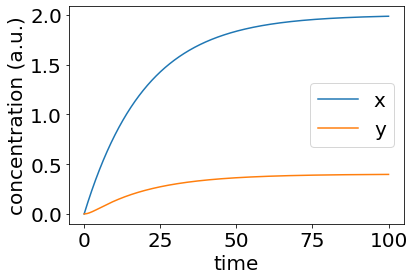

In [2]:
def test(xy,t):
    x,y=xy
    dx=alpha1-delta1*x
    dy=alpha2*x-delta2*y
    return [dx,dy]

alpha1 = 0.1
alpha2 = 0.1
delta1 = 0.05
delta2 = 0.5
tvec = np.arange(0,100,0.01)
x0 = [0,0]
y = odeint(test,x0,tvec)
plt.figure()
plt.rc('font', size=20)
plt.plot(tvec,y[:,0],label='x')
plt.plot(tvec,y[:,1],label='y')
plt.legend()
plt.xlabel('time')
plt.ylabel('concentration (a.u.)')
plt.show()

# Constitutive expression

The following equation can be used to model the constitutive expression of a gene:
    
$$\frac{dP}{dt}=\alpha-\delta P$$

1. Consider $\alpha=10$ and $\delta = 1$.
    1. What is the analytic expression for the steady state of the system?
    2. Plot the time evolution of the system starting from $P_0=0$ using scipy's odeint function.
    3. Does the final value of the trajectory in b) coincide with the analytical steady state?
    4. At what time does P reach half the steady state value? Plot a vertical line at that point.


<span style="color:blue">

*Answer 1.A.*

From the expression $\frac{dP}{dt}=\alpha-\delta P$ we get:

$$P(t) =  \frac{\alpha}{\delta}(1-e^{-\delta t})$$

The steady state of the system is 

$$\lim_{t \to \infty} P(t) = \frac{\alpha}{\delta} = \frac{10}{1} = 10$$.

*Answer 1C.*

The final value of the trajectory (9.991) almost entirely coincides with the analytical steady state value (10). The difference can be explained by the fact that this curve is asymptotic, it will never quite reach 10 (except for in the limit $t=\infty$). Apart from that the odeint function integrates in steps, depending on the size of those steps the trajectory will be closer (smaller steps) or less close (larger steps) to the analytical expression.

*Answer 1D.*

Half the steady state value is $\frac{\alpha}{2\delta}$. From this we can calculate the time:

$$ P(t) =  \frac{\alpha}{2\delta} = \frac{\alpha}{\delta}(1-e^{-\delta t})$$

$$ \frac{1}{2} = (1-e^{-\delta t}) \quad\Rightarrow\quad e^{-\delta t} = \frac{1}{2} $$

$$ ln(\frac{1}{2}) = -\delta t $$

$$ t = -\frac{ln(\frac{1}{2})}{\delta} = \frac{ln(2)}{\delta} $$
</span>

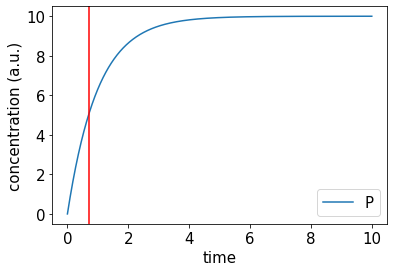

The final value of the plotted trajectory is 9.9995
The time at which P reaches half of its steady state value is t = 0.6931


In [3]:
def test(x,t):
    dx=alpha-delta*x
    return dx

alpha = 10
delta = 1
tvec = np.arange(0,10,0.01)
P0 = 0

y = odeint(test,P0,tvec)
plt.figure()
plt.rc('font', size=15)
plt.plot(tvec,y,label='P')
plt.legend()
half_ss = np.log(2)
plt.axvline(half_ss, color = 'r')
plt.xlabel('time')
plt.ylabel('concentration (a.u.)')
plt.show()

print("The final value of the plotted trajectory is", round(float(y[-1]), 4))
print("The time at which P reaches half of its steady state value is t =", round(half_ss, 4))

2. What happens for the following parameter sets, in comparison with the previous one? Plot the four of them in the same plot and compare them. 
    1. alpha=10, delta=10
    2. alpha=100, delta=10
    3. alpha=100, delta=1
 

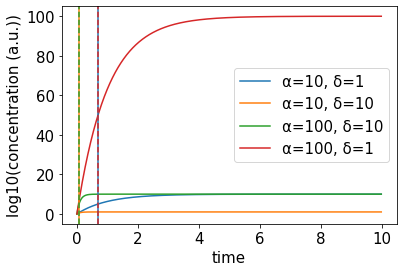

For α=10, δ=1, the steady state is 0.69
For α=10, δ=10, the steady state is 0.07
For α=100, δ=10, the steady state is 0.07
For α=100, δ=1, the steady state is 0.69


In [4]:
def test(xyz,t):
    x,y,z = xyz
    dx=alpha1-delta1*x
    dy=alpha2-delta2*y
    dz=alpha3-delta3*z
    return [dx,dy,dz]

alpha1 = 10
alpha2 = 100
alpha3 = 100
delta1 = 10
delta2 = 10
delta3 = 1

tvec = np.arange(0,10,0.01)
x0 = [0,0,0]

ABC = odeint(test,x0,tvec)

plt.figure()
plt.rc('font', size=15)
plt.plot(tvec,y,label='α=10, δ=1')
plt.plot(tvec,ABC[:,0],label='α=10, δ=10')
plt.plot(tvec,ABC[:,1],label='α=100, δ=10')
plt.plot(tvec,ABC[:,2],label='α=100, δ=1')
plt.axvline(np.log(2), color = 'tab:blue')
plt.axvline(np.log(2)/10, color = 'tab:orange')
plt.axvline(np.log(2)/10, linestyle = "--", color = 'tab:green')
plt.axvline(np.log(2), linestyle = "--", color = 'tab:red')
plt.legend()
plt.xlabel('time')
plt.ylabel('log10(concentration (a.u.))')
plt.show()

print("For α=10, δ=1, the steady state is", round(float(np.log(2)), 2))
print("For α=10, δ=10, the steady state is", round(float(np.log(2)/10), 2))
print("For α=100, δ=10, the steady state is", round(float(np.log(2)/10), 2))
print("For α=100, δ=1, the steady state is", round(float(np.log(2)), 2))

<span style="color:blue">The time needed to reach half the steady state value only depends on δ; on the other hand, the steady state concentration depends on the ratio α/δ,</span>

# Negative feedback

Now consider the following negative autoregulation system:


$$\frac{dR}{dt}=\frac{\alpha}{1+\left(\frac{R}{K}\right)^n} - \delta R$$

1. Plot the production term for alpha=5, K=1, and n ranging from 1 to 6, for a range of R values from 0 to 5. What is the effect of increasing n?

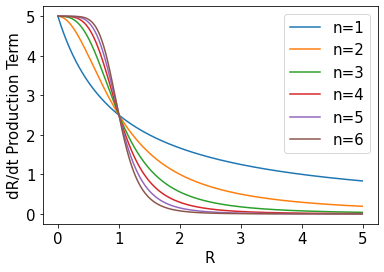

In [5]:
Rvec = np.arange(0, 5, 0.01)
alpha = 5
K = 1

plt.figure()
plt.rc('font', size=15)
for n in range(1, 7):
    plt.plot(Rvec,alpha/(1 + (Rvec/K)**n), label=("n=%i"%n))
plt.xlabel('R') 
plt.ylabel('dR/dt Production Term')
plt.legend()
plt.show()

<span style="color:blue">If n is increased, the slope will increase as well and the curve will look more like a step-function.</span>

2. Now fix n to 4, and plot the production term for K = 1, 2, and 4. What is the effect?

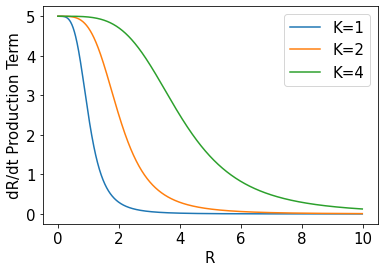

In [6]:
Rvec = np.arange(0, 10, 0.01)
alpha = 5
n = 4
k_list = [1, 2, 4]

plt.figure()
plt.rc('font', size=15)
for K in k_list:
    plt.plot(Rvec,alpha/(1 + (Rvec/K)**n), label=("K=%i"%K))
    plt.xlabel('R')
    plt.ylabel('dR/dt Production Term')
plt.legend()
plt.show()

<span style="color:blue">If K is changed, the curve's step will shift to the right; it's center will always be approximately R = K.</span>

3. If you wanted to build a repression system that is highly repressed at low values of repressor, how would you choose K and n? (in terms of low/high values) 

<span style="color:blue">We should choose a low value for K and a high value for n.</span>

# Study the response timescale of the system:

1. We will now compare how quickly the two models introduced above generate their product. To that end:
    1. Integrate the negative feedback model for $n=4$, $K=1$, $\alpha=10$ and $\delta=1$, starting from $R=0$ and compute the time to reach half the steady state concentration.
    2. Integrate the constitutive expression model with $\alpha=1.5$ and $\delta=1$ starting from $R=0$ and compute the time to reach half the steady state concentration. 
    3. Compare the results of B) and C).

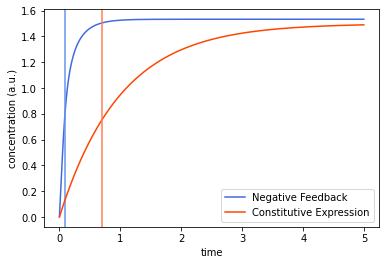

The time it takes to reach half the steady-state concentration in our negative feedback model is  0.1
The time it takes to reach half the steady-state concentration in our constitutive expression model is  0.7


In [7]:
def test(x,t):
    dx = alpha/(1 + (x/K)**n) - delta*x
    return dx

alpha = 10
delta = 1
tvec = np.arange(0,5,0.01)
R0 = 0
n = 4
K = 1

R = odeint(test,R0,tvec)
plt.figure()
plt.rc('font', size=10)
plt.plot(tvec,R,label='Negative Feedback', color = "royalblue")
plt.axvline(tvec[np.abs(R - R[-1]/2).argmin()], color = 'cornflowerblue')
plt.xlabel('time')
plt.ylabel('concentration (a.u.)')

negative_half_ss = tvec[np.abs(R - R[-1]/2).argmin()]

def test(x,t):
    dx=alpha-delta*x
    return dx

alpha = 1.5
R0 = 0

R = odeint(test,R0,tvec)
plt.plot(tvec,R,label='Constitutive Expression', color = "orangered")
plt.axvline(tvec[np.abs(R - R[-1]/2).argmin()], color = "coral")
plt.legend()
plt.show()

print("The time it takes to reach half the steady-state concentration in our negative feedback model is ",
      round(negative_half_ss, 1))
print("The time it takes to reach half the steady-state concentration in our constitutive expression model is ",
      round(tvec[np.abs(R - R[-1]/2).argmin()], 1))

<span style="color:blue">It takes the constitutive expression much more time to get to the steady state than it does the negative feedback model.</span>

# Adaptation to perturbations

Integrate the negative feedback model for n=4, K=1, $\alpha=10$ and $\delta=1$, starting from R=0, for 10 time units. At that point, double the value of $\alpha$ and integrate for another 10 time units. Does the system return to the same steady state as before?

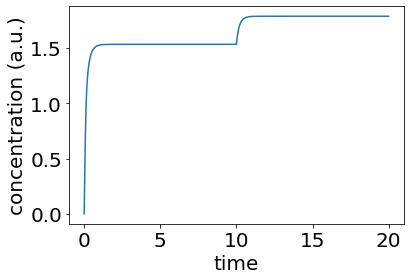

In [8]:
def test(x,t):
    dx = alpha/(1 + (x/K)**n) - delta*x
    return dx

alpha = 10
delta = 1
tvec = np.arange(0,10,0.01)
R0 = 0
n = 4
K = 1

R = odeint(test,R0,tvec)
plt.figure()
plt.rc('font', size=20)
plt.plot(tvec,R,label='R')

def test(x,t):
    dx = alpha/(1 + (x/K)**n) - delta*x
    return dx

alpha = 20
tvec = np.arange(10,20,0.01)
R0 = R[-1]

R = odeint(test,R0,tvec)
plt.plot(tvec,R,label='R', color = "tab:blue")

plt.xlabel('time')
plt.ylabel('concentration (a.u.)')
plt.show()

<span style="color:blue">No, it doesn't return to the same steady state as before, but the new steady state is very close to the old one.</span>

Do the same for the constitutive expression model.

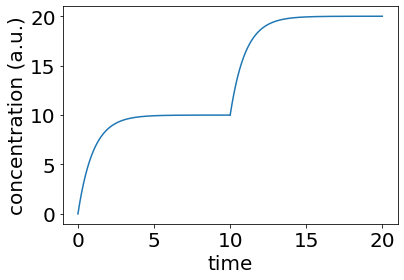

In [9]:
def test(x,t):
    dx=alpha-delta*x
    return dx

alpha = 10
delta = 1
tvec = np.arange(0,10,0.01)
R0 = 0

R = odeint(test,R0,tvec)
plt.figure()
plt.rc('font', size=20)
plt.plot(tvec,R,label='R')

def test(x,t):
    dx=alpha-delta*x
    return dx

alpha = 20
tvec = np.arange(10,20,0.01)
R0 = 10

R = odeint(test,R0,tvec)
plt.plot(tvec,R,label='R', color = "tab:blue")

plt.xlabel('time')
plt.ylabel('concentration (a.u.)')
plt.show()

<span style="color:blue">We still get a new steady state value, but in this case, it differs a lot more from the old steady state.</span>

Interpret the results above in terms of the difference in robustness between the two models.

<span style="color:blue">The negative feedback model is much more robust to a change in α than the constitutive expression model; that means that when $\alpha$ is changed, there won't be a drastic change in the steady state value of our negative feedback model, compared to the constitutive expression model.</span>